In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [26]:
df.shape

(49068, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [28]:
df.rename(columns={'Province/State':'State','Country/Region':'Country'}, inplace=True)
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [29]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [30]:
df['Date'].max()

'2020-07-27'

In [31]:
df[df['Date']=='2020-07-27'].head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [32]:
df_country = df.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
df_country

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


## visualize the impact and analyze the trend of rate of infection and recovery

In [33]:
#confurmed cases in each date
confirmed_cases = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


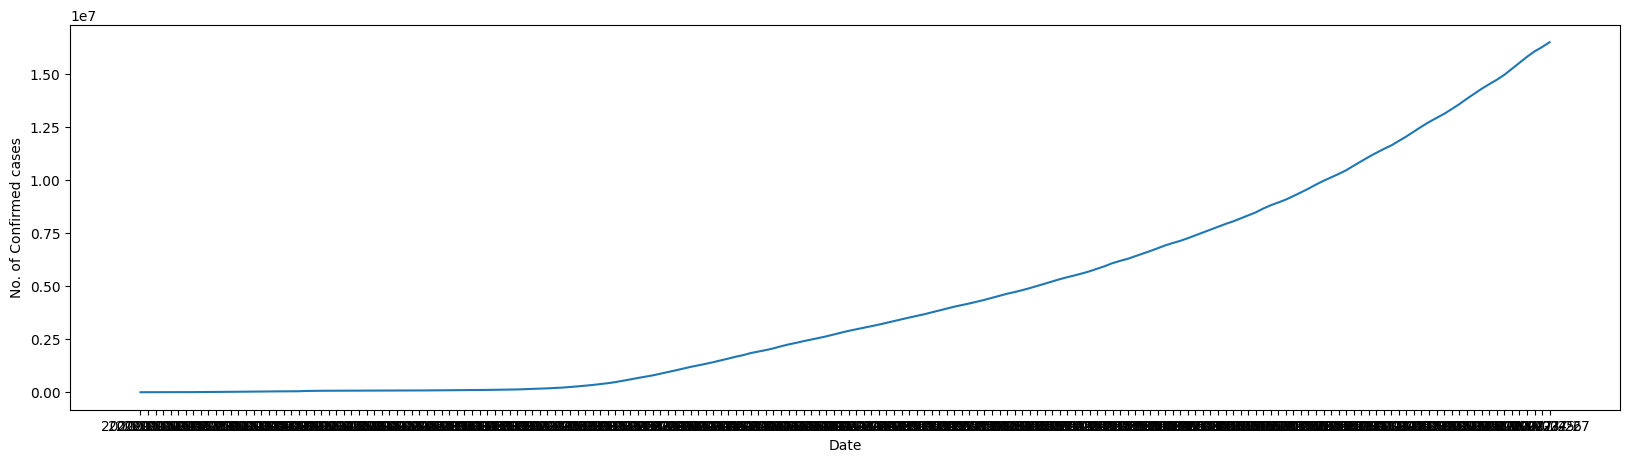

In [34]:
#plot this Confirmed trand
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed_cases, x='Date', y='Confirmed')
plt.xlabel('Date')
plt.ylabel('No. of Confirmed cases')
plt.show()

In [35]:
recovered_cases = df.groupby('Date')['Recovered'].sum().reset_index()
recovered_cases

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


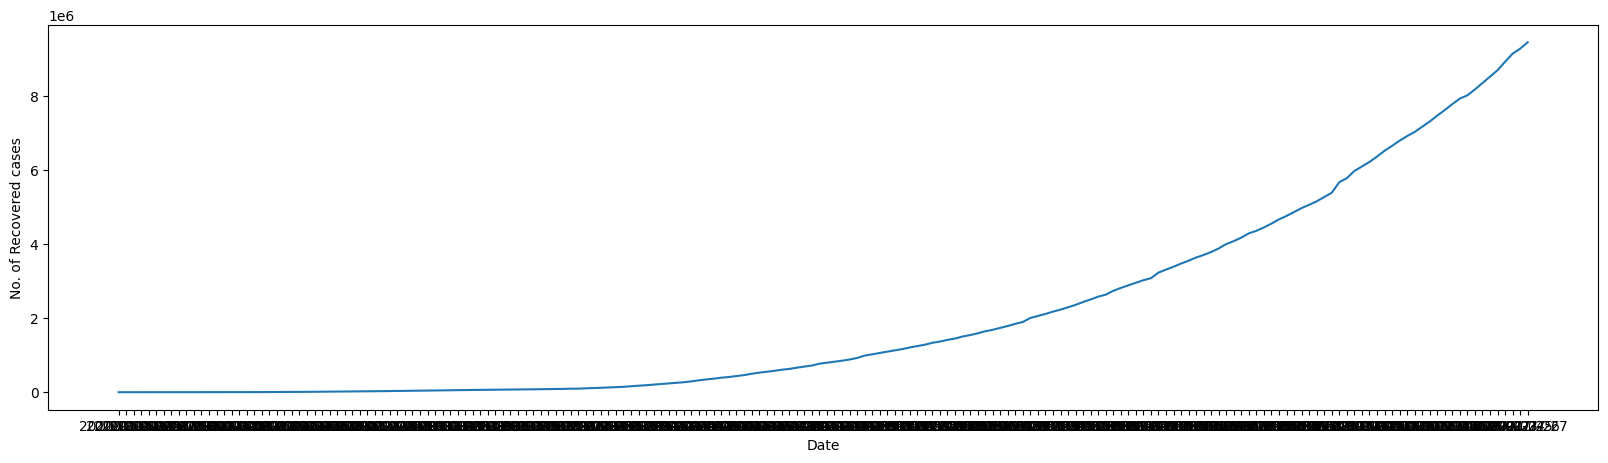

In [36]:
#plot this Recovered trand
plt.figure(figsize=(20,5))
sns.lineplot(data=recovered_cases, x='Date', y='Recovered')
plt.xlabel('Date')
plt.ylabel('No. of Recovered cases')
plt.show()

In [37]:
Active_cases = df.groupby('Date')['Active'].sum().reset_index()
Active_cases

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


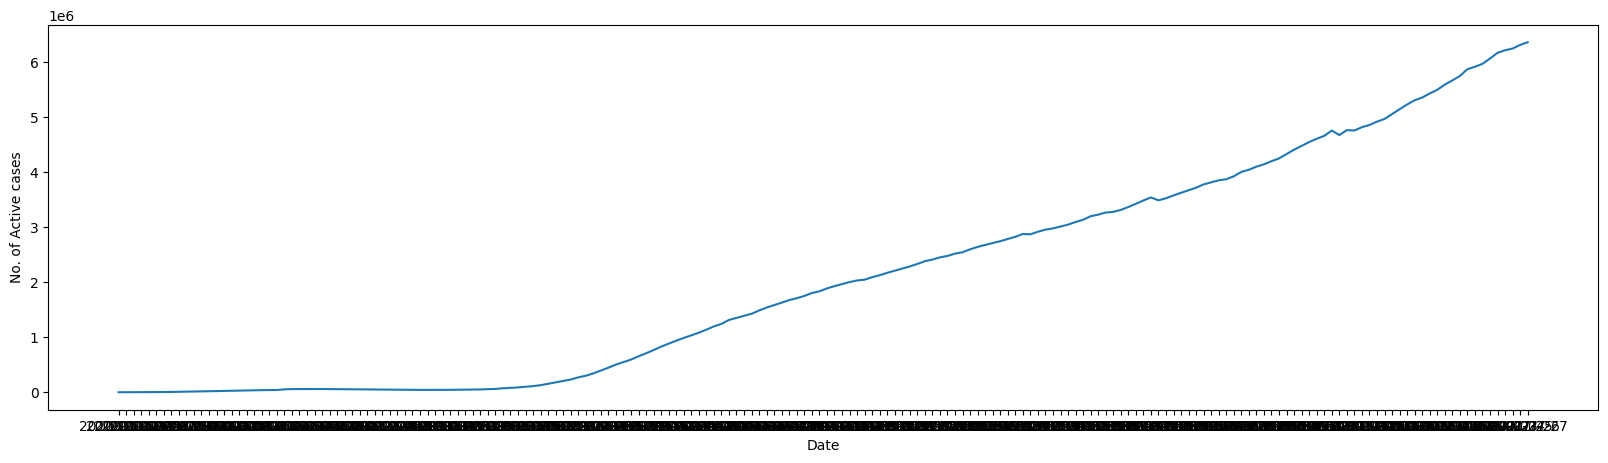

In [38]:
#plot this Active trand
plt.figure(figsize=(20,5))
sns.lineplot(data=Active_cases, x='Date', y='Active')
plt.xlabel('Date')
plt.ylabel('No. of Active cases')
plt.show()

In [39]:
Deaths_cases = df.groupby('Date')['Deaths'].sum().reset_index()
Deaths_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


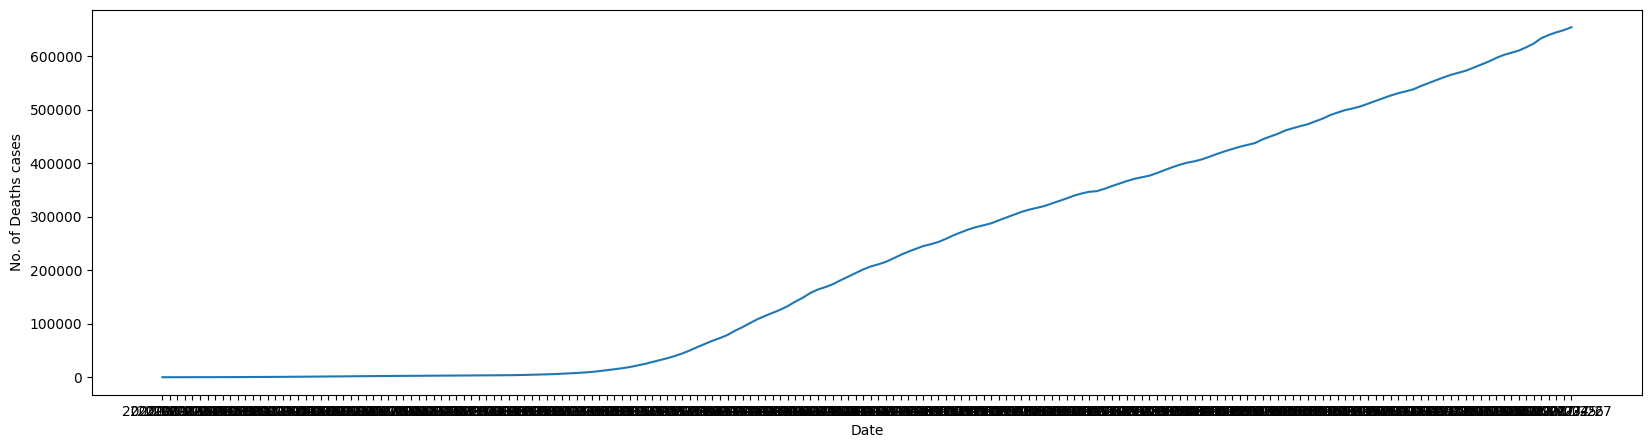

In [40]:
#plot this Deaths trand
plt.figure(figsize=(20,5))
sns.lineplot(data=Deaths_cases, x='Date', y='Deaths')
plt.xlabel('Date')
plt.ylabel('No. of Deaths cases')
plt.show()

## visualize the impact and analyze the trend of rate of infection and recovery

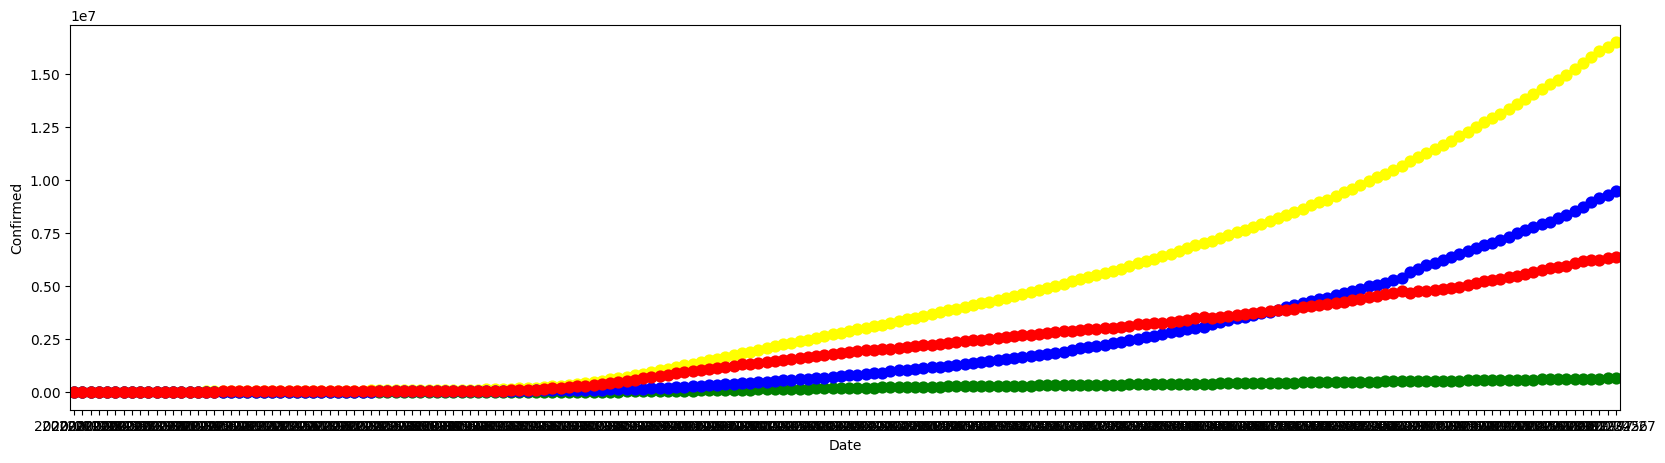

In [41]:
plt.figure(figsize=(20,5))
sns.pointplot(confirmed_cases, x='Date', y='Confirmed', color='Yellow')
sns.pointplot(Deaths_cases, x='Date', y='Deaths', color='Green')
sns.pointplot(recovered_cases, x='Date', y='Recovered', color='Blue')
sns.pointplot(Active_cases, x='Date', y='Active', color='Red')
plt.show()

#From analyze the traind we can say that infection cases means comfermed cases is much more higher than the Recorved Rate

In [42]:
#most effected countries
# 1.USA
# 2.CHINA
# 3.INDIA
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [43]:
US =df[df['Country']=='US']
US

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [44]:
US = US.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [45]:
China =df[df['Country']=='China']
China

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [46]:
China = China.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
China

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [47]:
India =df[df['Country']=='India']
India

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [48]:
India = India.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


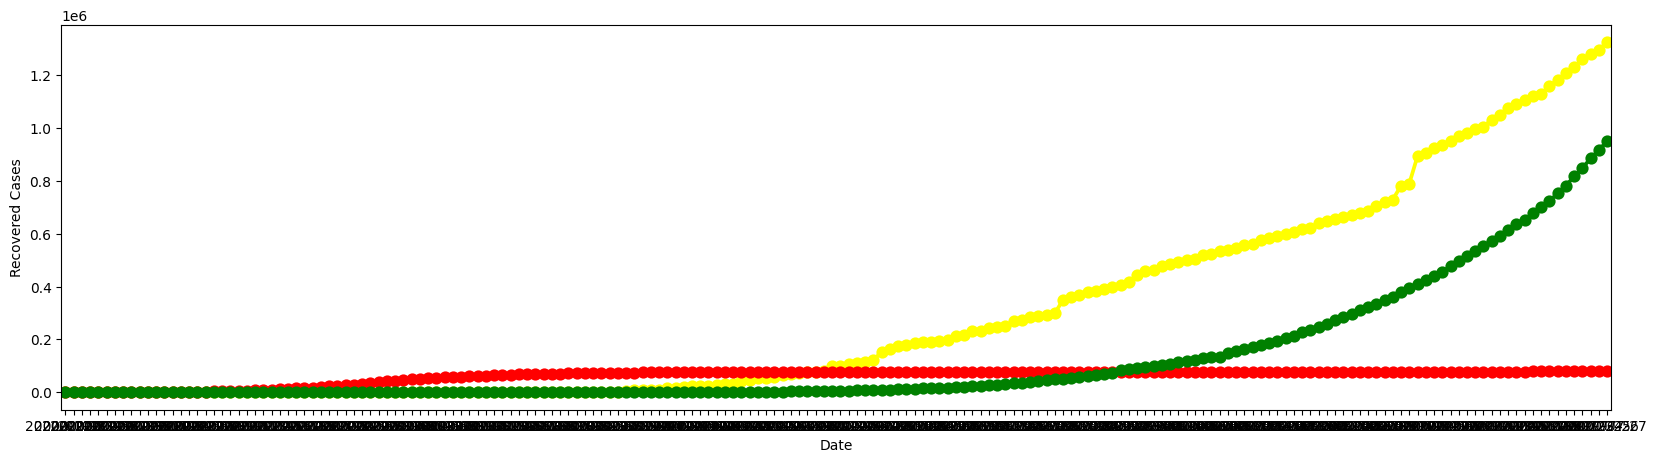

In [49]:
plt.figure(figsize=(20,5))
sns.pointplot(US, x='Date', y='Recovered', color='Yellow')
sns.pointplot(China, x='Date', y='Recovered', color='Red')
sns.pointplot(India, x='Date', y='Recovered', color='Green')
# sns.pointplot(Active_cases, x='Date', y='Active', color='Red')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.show()

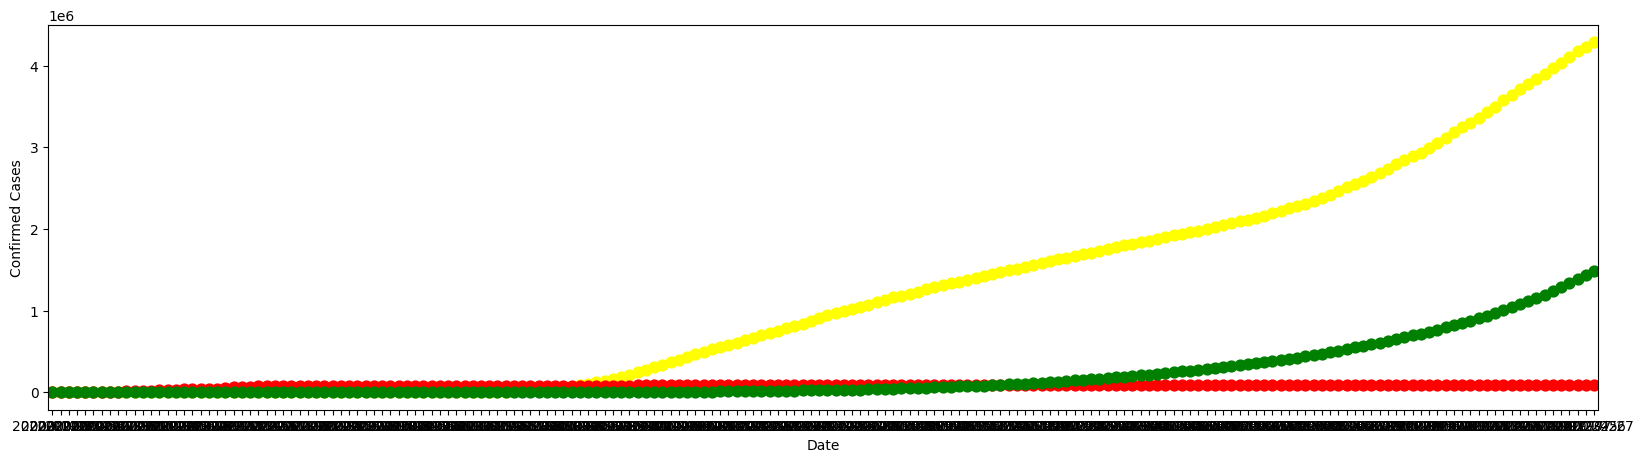

In [50]:
plt.figure(figsize=(20,5))
sns.pointplot(US, x='Date', y='Confirmed', color='Yellow')
sns.pointplot(China, x='Date', y='Confirmed', color='Red')
sns.pointplot(India, x='Date', y='Confirmed', color='Green')
# sns.pointplot(Active_cases, x='Date', y='Active', color='Red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

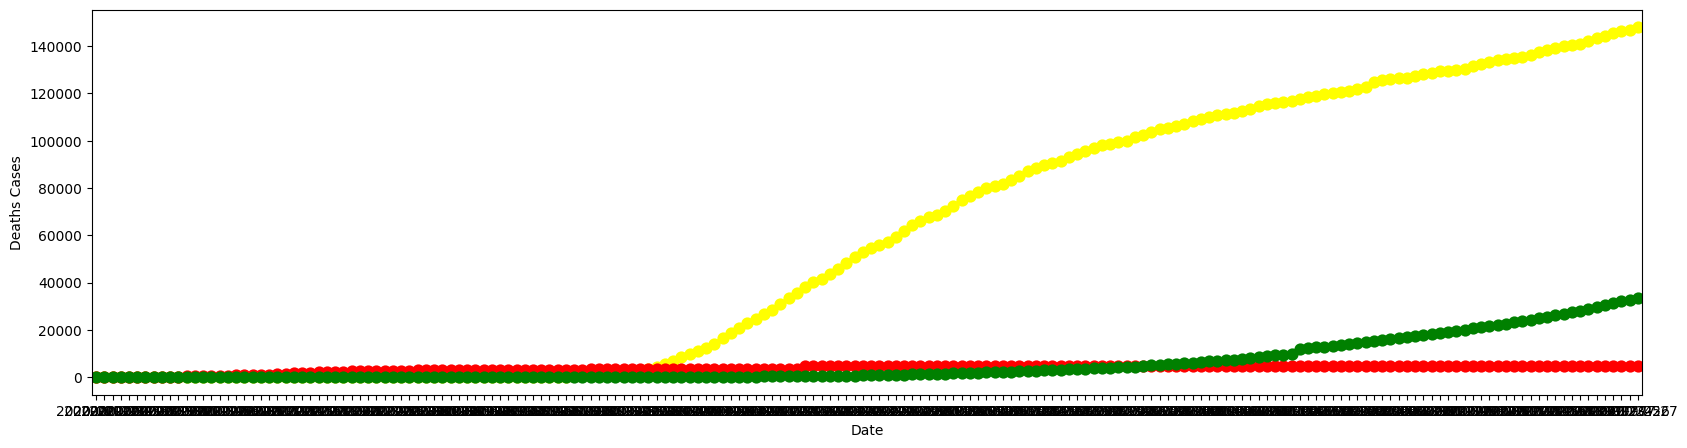

In [51]:
plt.figure(figsize=(20,5))
sns.pointplot(US, x='Date', y='Deaths', color='Yellow')
sns.pointplot(China, x='Date', y='Deaths', color='Red')
sns.pointplot(India, x='Date', y='Deaths', color='Green')
# sns.pointplot(Active_cases, x='Date', y='Active', color='Red')
plt.xlabel('Date')
plt.ylabel('Deaths Cases')
plt.show()

In [52]:
import plotly

In [53]:
import plotly.express as px

In [54]:
world = df.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [55]:
figure = px.choropleth(world, locations='Country',locationmode='country names',color='Deaths',range_color=[0,10000],color_continuous_scale='reds',title='Visualizing world map for the active casses')
figure.show()

##Model Building


In [56]:
#installing prophet

!pip install prophet


'''Prophet is the time series forcastionf rull devoloped by facebook that is design to be easy to use and effective for a
wide range of time series data. It is particularly useful for data that have strong seasonal effects (like daily or weakly paterns)
and includes inportant date or events that can impace the forcast.'''

'Prophet is the time series forcastionf rull devoloped by facebook that is design to be easy to use and effective for a\nwide range of time series data. It is particularly useful for data that have strong seasonal effects (like daily or weakly paterns)\nand includes inportant date or events that can impace the forcast.'

In [57]:
#The columns name shoulds be ds and y and its mendatory

confirmed_cases=df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [58]:
#for corfirmed cases
confirmed_cases.columns=['ds','y']
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [59]:
from prophet import Prophet

In [60]:
model = Prophet()

##Make predictions about the number of cases expected a week in future based on the current trends.

In [61]:
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv9zuwos6/cvg1lms1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv9zuwos6/bgkq5xcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57863', 'data', 'file=/tmp/tmpv9zuwos6/cvg1lms1.json', 'init=/tmp/tmpv9zuwos6/bgkq5xcl.json', 'output', 'file=/tmp/tmpv9zuwos6/prophet_modeli5e2abrf/prophet_model-20250516151512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:15:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
future = model.make_future_dataframe(periods=7)
forcasted = model.predict(future)
forcasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.250974e+05,8.059389e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.136997e+05,8.892182e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-8.696934e+04,1.115598e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.867367e+04,1.144657e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.591460e+04,1.180636e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.664136e+07,1.684753e+07,1.673898e+07,1.674964e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684872e+07,1.705957e+07,1.693648e+07,1.695915e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705666e+07,1.727547e+07,1.713495e+07,1.717103e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725687e+07,1.748711e+07,1.733070e+07,1.738491e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [64]:
forcasted_split=forcasted[['ds','yhat_lower','yhat','yhat_upper']]
forcasted_split

,ds,yhat_lower,yhat,yhat_upper
0,2020-01-22,-1.250974e+05,-2.067684e+04,8.059389e+04
1,2020-01-23,-1.136997e+05,-8.050948e+03,8.892182e+04
2,2020-01-24,-8.696934e+04,5.827455e+03,1.115598e+05
3,2020-01-25,-9.867367e+04,1.217668e+04,1.144657e+05
4,2020-01-26,-9.591460e+04,8.405020e+03,1.180636e+05
...,...,...,...,...
190,2020-07-30,1.664136e+07,1.674391e+07,1.684753e+07
191,2020-07-31,1.684872e+07,1.695910e+07,1.705957e+07
192,2020-08-01,1.705666e+07,1.716676e+07,1.727547e+07
193,2020-08-02,1.725687e+07,1.736430e+07,1.748711e+07


In [69]:
forcasted_asc = forcasted_split.sort_values('ds')
forcasted_asc

,ds,yhat_lower,yhat,yhat_upper
0,2020-01-22,-1.250974e+05,-2.067684e+04,8.059389e+04
1,2020-01-23,-1.136997e+05,-8.050948e+03,8.892182e+04
2,2020-01-24,-8.696934e+04,5.827455e+03,1.115598e+05
3,2020-01-25,-9.867367e+04,1.217668e+04,1.144657e+05
4,2020-01-26,-9.591460e+04,8.405020e+03,1.180636e+05
...,...,...,...,...
190,2020-07-30,1.664136e+07,1.674391e+07,1.684753e+07
191,2020-07-31,1.684872e+07,1.695910e+07,1.705957e+07
192,2020-08-01,1.705666e+07,1.716676e+07,1.727547e+07
193,2020-08-02,1.725687e+07,1.736430e+07,1.748711e+07


#Take the last 7 day data which is predected

In [70]:
forcasted_last_7days = forcasted_asc.tail(7)
forcasted_last_7days

,ds,yhat_lower,yhat,yhat_upper
188,2020-07-28,1.622284e+07,1.632020e+07,1.642672e+07
189,2020-07-29,1.642661e+07,1.652997e+07,1.664009e+07
190,2020-07-30,1.664136e+07,1.674391e+07,1.684753e+07
191,2020-07-31,1.684872e+07,1.695910e+07,1.705957e+07
192,2020-08-01,1.705666e+07,1.716676e+07,1.727547e+07
193,2020-08-02,1.725687e+07,1.736430e+07,1.748711e+07
194,2020-08-03,1.744621e+07,1.755889e+07,1.767270e+07


#yhat is the predicted value of the confirmed cased (1.632020e+07)
#yhat_lower is the 95% confidanse interval of the actual data(1.622284e+07)
#yhat_upper is the worstcase planning(1.642672e+07)
# in the date 2020-07-28

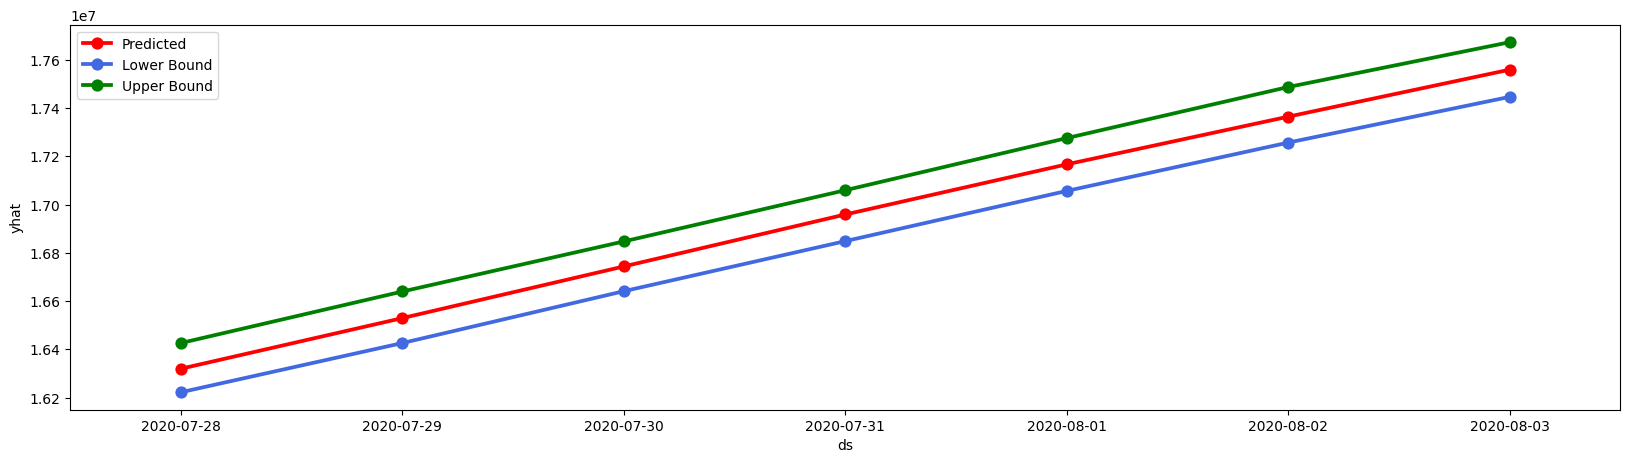

In [79]:
plt.figure(figsize=(20,5))
sns.pointplot(forcasted_last_7days,x='ds',y='yhat',color='red',label='Predicted')
sns.pointplot(forcasted_last_7days,x='ds',y='yhat_lower',color='royalblue',label='Lower Bound')
sns.pointplot(forcasted_last_7days,x='ds',y='yhat_upper',color='green',label='Upper Bound')
plt.legend()
plt.show()

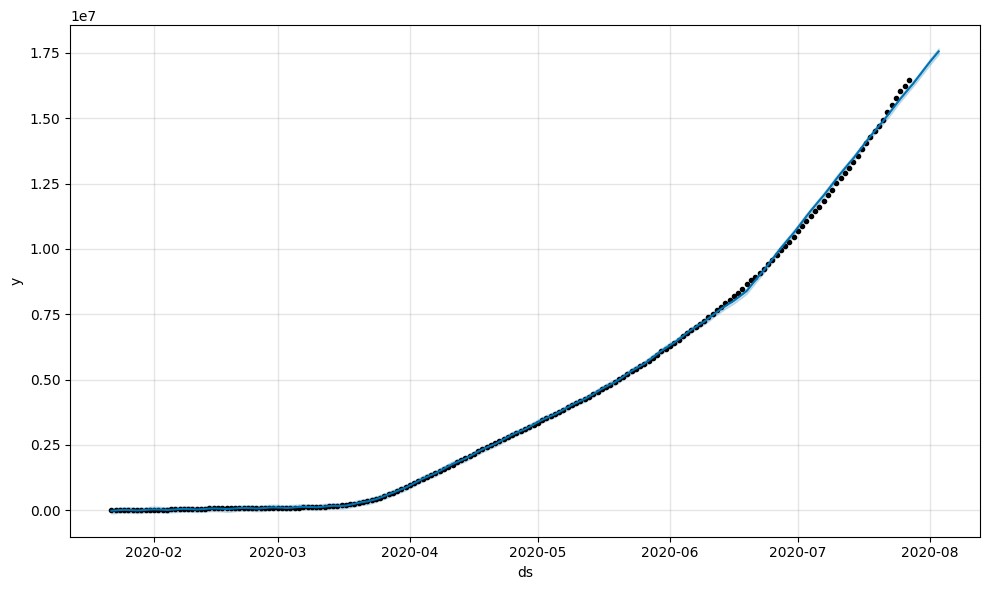

In [80]:
model.plot(forcasted)
plt.show()